In [1]:
from pathlib import Path
import torch

from deepmash.data_processing.gtzan_stems import GTZANStemsDataset, ToLogMel
from deepmash.data_processing.constants import *

# reload imported modules automatically (so you dont have to restart kernel when changing .py files)
%load_ext autoreload
%autoreload 2

In [2]:
ds = GTZANStemsDataset(
    root_dir="datasets/gtzan-stems",
    preprocess=True
)

Preprocessing GTZAN stems from datasets/gtzan-stems to datasets/gtzan-stems-processed ...


  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/valle/Library/CloudStorage/OneDrive-KTH/Dokument/KTH/musik-dt2470/deep-mash/.venv/lib/python3.13/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(


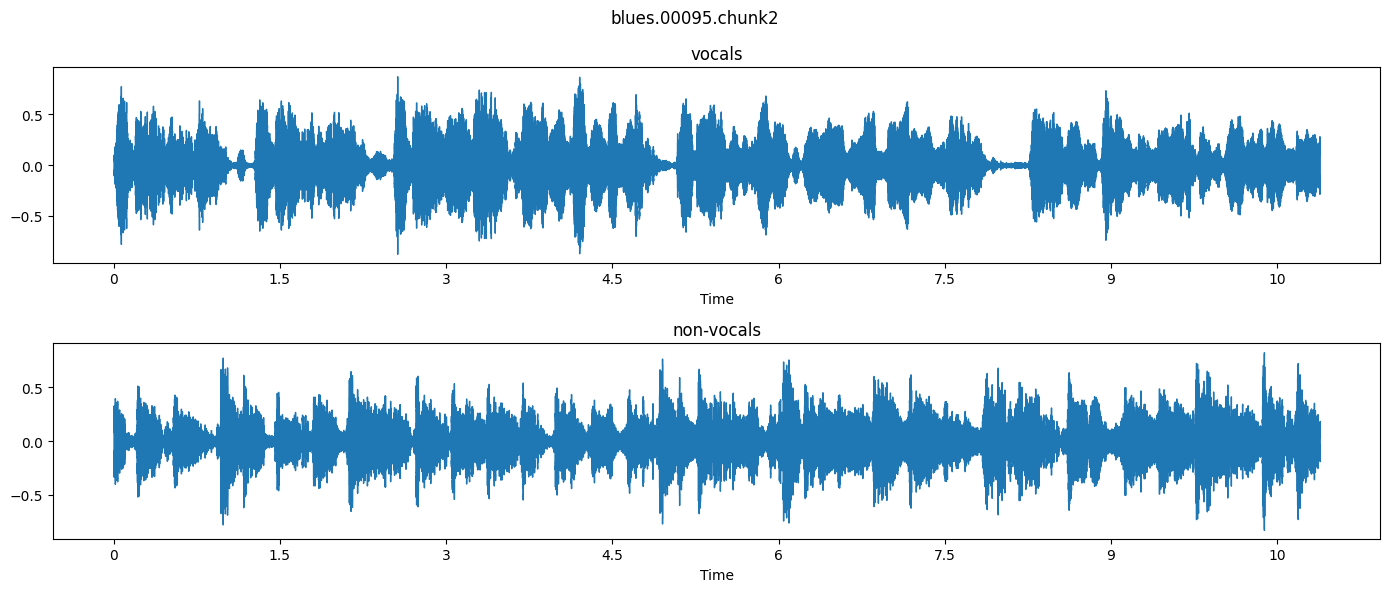

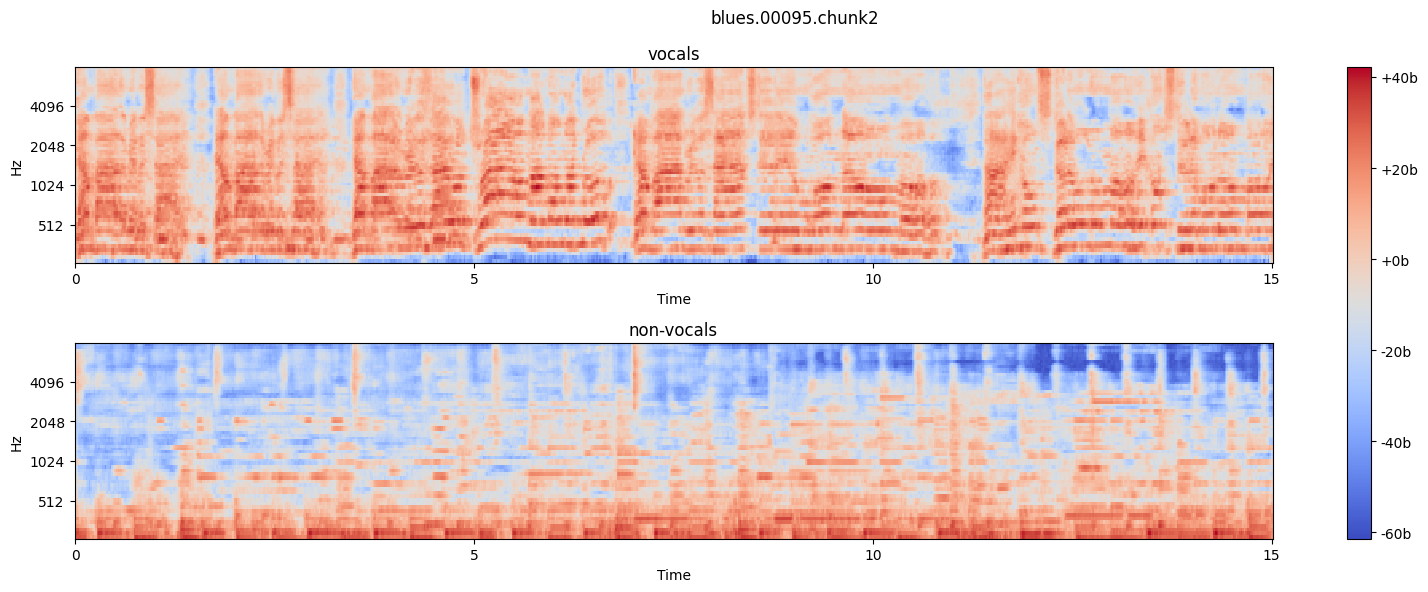

vocals: shape=torch.Size([64, 751]), mean=2.2478981018066406
non-vocals: shape=torch.Size([64, 751]), mean=-11.787323951721191


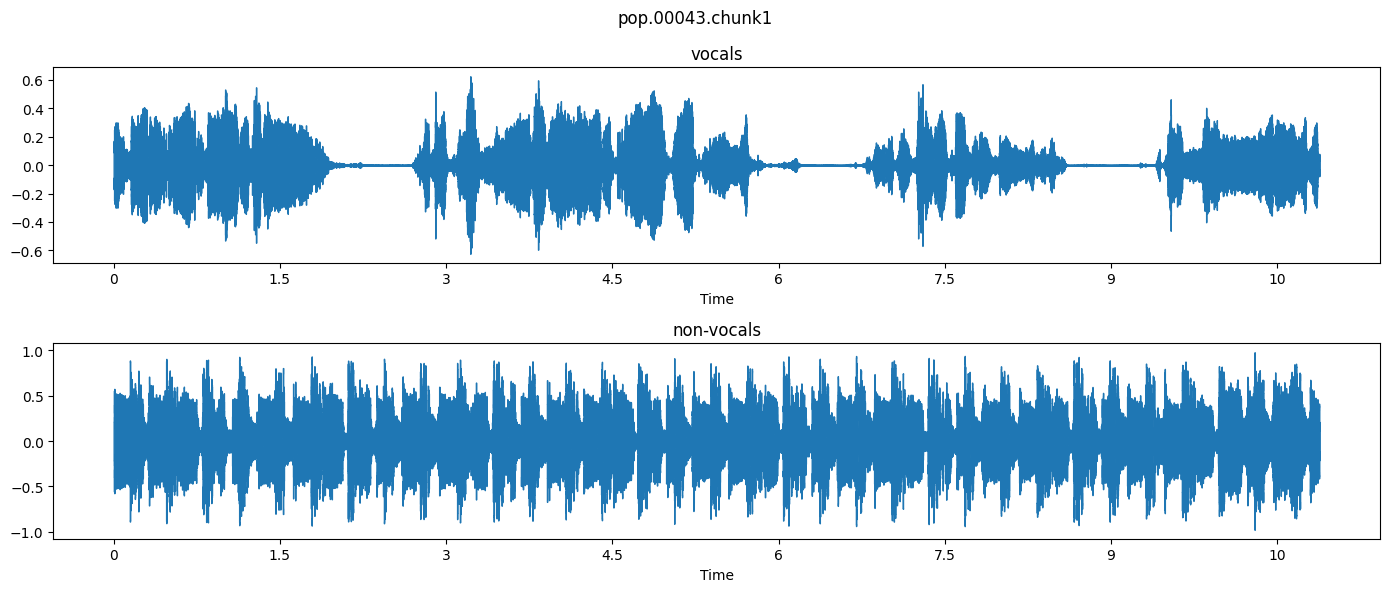

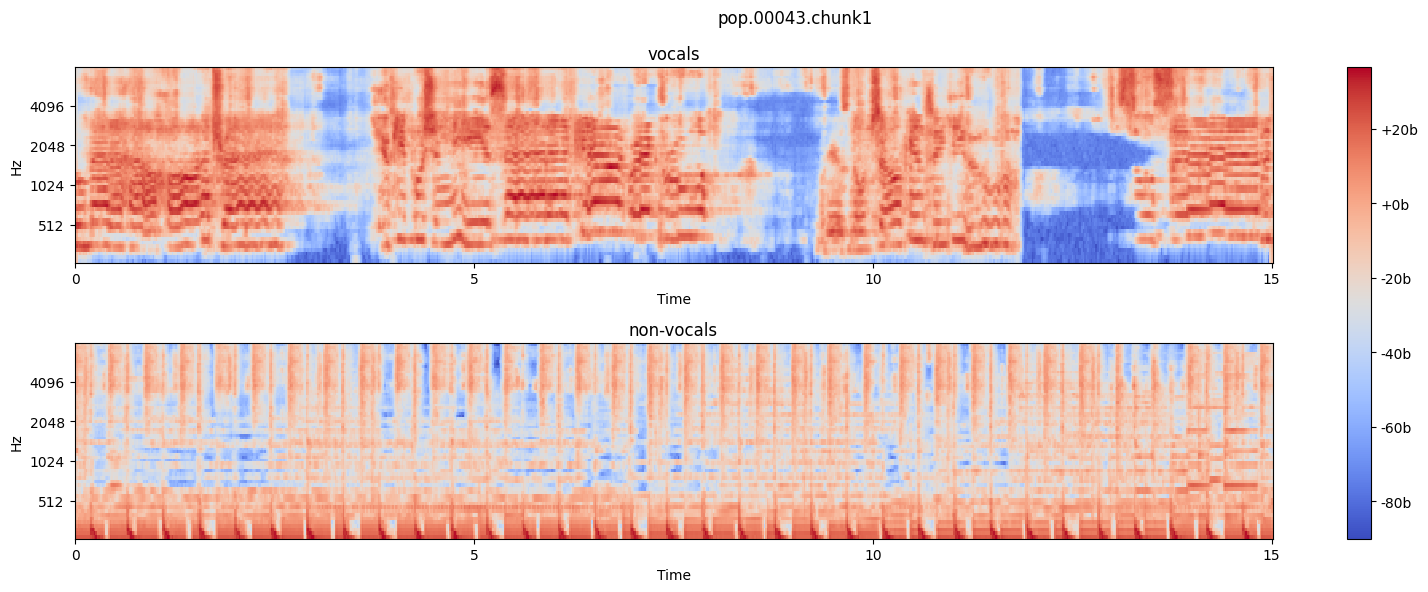

vocals: shape=torch.Size([64, 751]), mean=-15.663505554199219
non-vocals: shape=torch.Size([64, 751]), mean=4.193317413330078


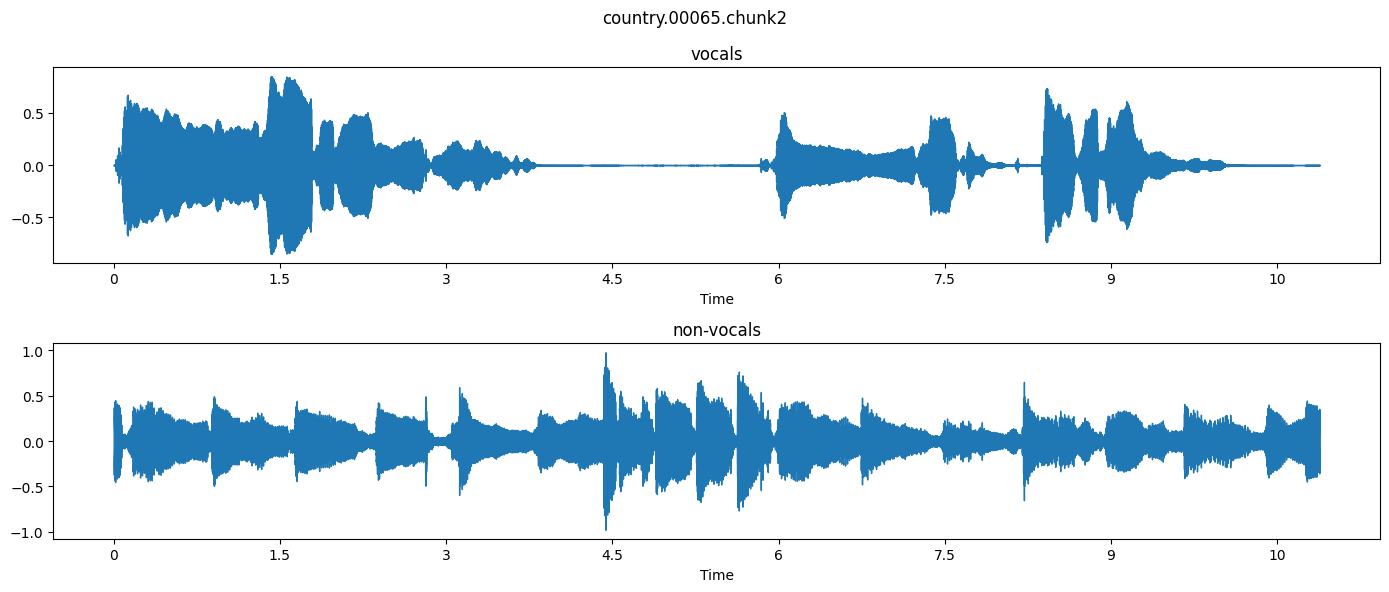

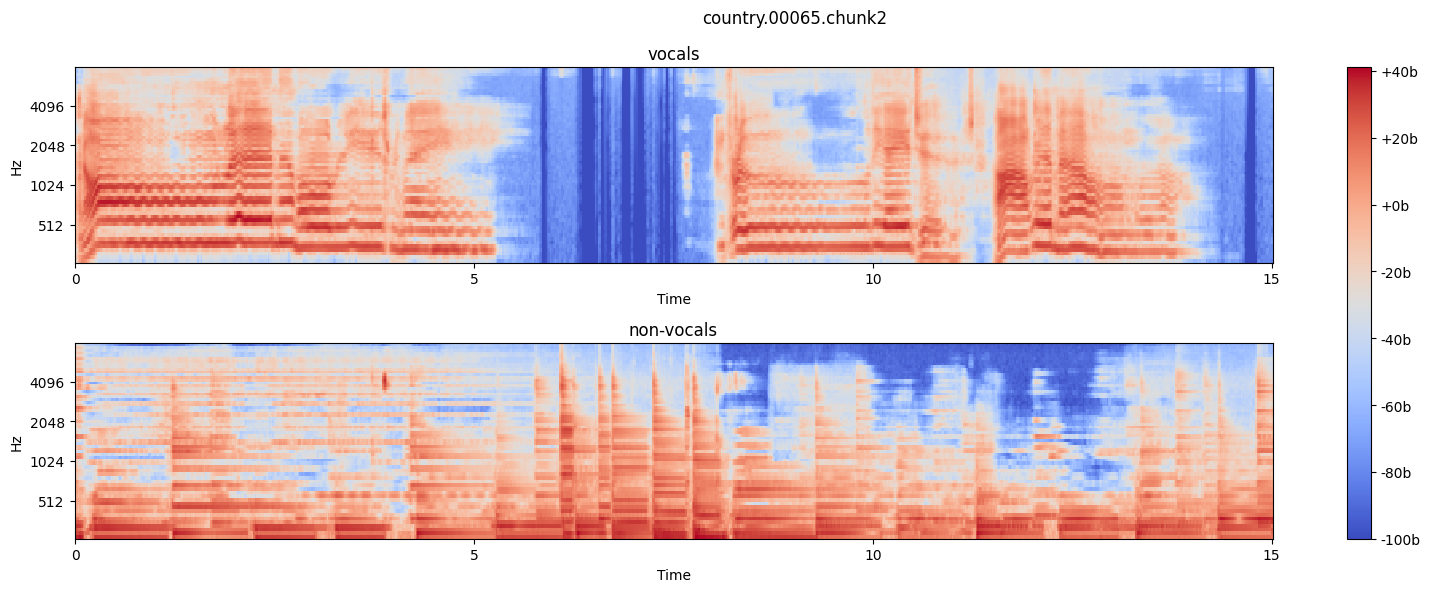

vocals: shape=torch.Size([64, 751]), mean=-28.370941162109375
non-vocals: shape=torch.Size([64, 751]), mean=-9.913363456726074


In [7]:
import random
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

def display_processed_chunk(p: Path):
    track_name = p.name
    vocals = torch.load(p/"vocals.pt").squeeze()
    non_vocals = torch.load(p/"non-vocals.pt").squeeze()

    if vocals.ndim == 1 and non_vocals.ndim == 1: # guard against maybe saving melspectrograms later 
        vocals_np, non_vocals_np = vocals.numpy(), non_vocals.numpy()
        fig, axs = plt.subplots(2,1, figsize=(14,6))
        fig.suptitle(track_name)
        axs[0].set_title("vocals"); axs[1].set_title("non-vocals")
        librosa.display.waveshow(vocals_np, ax=axs[0])
        librosa.display.waveshow(non_vocals_np, ax=axs[1])
        fig.tight_layout()

        display(Audio(vocals_np, rate=TARGET_SR))
        display(Audio(non_vocals_np, rate=TARGET_SR))
        
        vocals_mel = ToLogMel()(vocals)
        non_vocals_mel = ToLogMel()(non_vocals)
        fig, axs = plt.subplots(2,1, figsize=(16, 6))
        fig.suptitle(track_name)
        axs[0].set_title("vocals"); axs[1].set_title("non-vocals")
        im0 = librosa.display.specshow(vocals_mel.numpy(), sr=TARGET_SR, hop_length=HOP_SIZE, n_fft=WINDOW_SIZE, fmin=F_MIN, fmax=F_MAX,
                                 x_axis="time", y_axis="mel", ax=axs[0])
        im1 = librosa.display.specshow(non_vocals_mel.numpy(), sr=TARGET_SR, hop_length=HOP_SIZE, n_fft=WINDOW_SIZE, fmin=F_MIN, fmax=F_MAX,
                                 x_axis="time", y_axis="mel", ax=axs[1])
        fig.tight_layout()
        fig.colorbar(im0, ax=axs, format="%+ db")
        plt.show()
        
        print(f"vocals: shape={vocals_mel.shape}, mean={vocals_mel.mean()}")
        print(f"non-vocals: shape={non_vocals_mel.shape}, mean={non_vocals_mel.mean()}")

def display_random_chunk():
    all_paths = list(p.parent for p in ds.processed_root.glob(r"*/*.pt"))
    p = random.choice(all_paths)
    display_processed_chunk(p)

for _ in range(3):
    display_random_chunk()